In [2]:
import numpy as np
from scipy.integrate import simps
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [59]:
raw = np.array(pd.read_excel('raw data.xlsx'))
raw = np.ravel(raw[:,4])
raw = raw[np.logical_not(np.isnan(raw))]
print(raw.shape)
print(raw)

(1092,)
[ 352.  352.  352. ...,  352.  352.  352.]


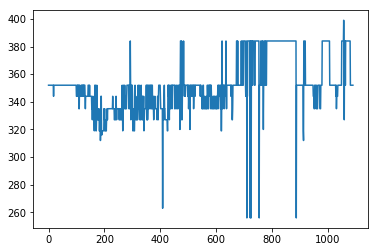

In [60]:
plt.plot(raw)

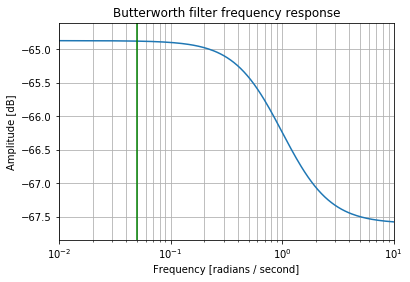

In [61]:
from scipy import signal
Wn = 0.05
b, a = signal.butter(3, Wn)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(Wn, color='green') # cutoff frequency
plt.show()

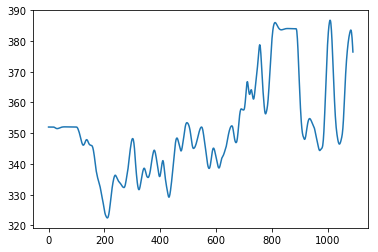

In [62]:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, raw, zi=zi*raw[0])
plt.plot(z)

In [71]:
### following maps analog read values from 0 to 675 to -3 to 3
amax = 675 # maximum ADC value since 3.3V -> 675 and 5V -> 1023
gscale = 3.6*9.8/(amax/2) # sensor can measure up to 3g acceleration.
# compensates for value read when the accelerometer is flat
# ideally when not moving it should read 337,usually its 352 so 15 off
readflat = 337
compensation = readflat - amax//2
print(compensation)
scaled = (z - amax/2-compensation)*gscale

0


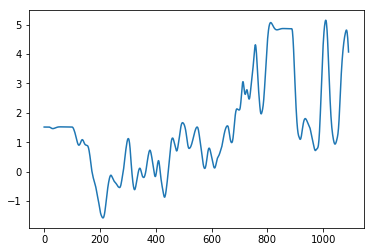

In [72]:
plt.plot(scaled)

In [73]:
baud = 9600 # bit rate bps
packet = 11 # each packet is 11 bits
step = packet/baud # data rate
t = np.arange(0, (len(raw)-1)*step, step)

In [74]:
#print(raw.shape)
#print(t.shape)
vel = np.zeros((len(t),))

for i in np.arange(len(t)-1):
    if i > 0:
        vel[i] = simps(scaled[:i], t[:i])

dist = simps(vel,t)
print(dist)

0.717427880918


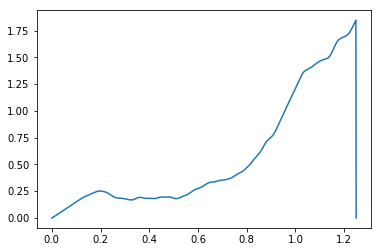

In [75]:
plt.plot(t,vel)